In [103]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

In [105]:

outdir = '/home/u0890475/Documents/SW_analysis_result/amr3/p45'



In [136]:
y_h2_ub = 0.013040
d1z = '/home/u0890475/Downloads/amr3_p45_fullfb/plt48750_p45_withZ.csv'
d_ext =  "/home/u0890475/Documents/SW_analysis_result/cantera_result/PMCF_T_298_P_101325_K_0.csv" 
d3 = "/home/u0890475/Documents/SW_analysis_result/cantera_result/premixed_flame_profile_240pts.csv"
d_sline = '/home/u0890475/Documents/SW_analysis_result/amr3/p45_line/plt48750_p45_line.csv'
d_10th_strain = '/home/u0890475/Documents/SW_analysis_code/output/full_profile_K1over10flashback_T298_P101325.csv'

fname = d1z.split('/')[-1].split('.')[0]
print(fname)


df_ext = pd.read_csv(d_ext)
df_ff = pd.read_csv(d3)
df = pd.read_csv(d1z)

df_sline = pd.read_csv(d_sline)
df_10th = pd.read_csv(d_10th_strain)

plt48750_p45_withZ


In [134]:
df_10th.columns

Index(['Y(H2)', 'Y(O2)', 'Y(H2O)', 'Y(H)', 'Y(O)', 'Y(OH)', 'Y(HO2)',
       'Y(H2O2)', 'Y(N2)', 'T', 'z'],
      dtype='object')

In [138]:
temp_c = 1- np.array(df['Y(H2)'])/y_h2_ub
c_ext = [1- i/y_h2_ub for i in df_ext['Y(H2)'] ]
c_ff = [1- j/y_h2_ub for j in df_ff['Y(H2)']]
c_line = [1- j/y_h2_ub for j in df_sline['Y(H2)']]
c_10 = [1- j/y_h2_ub for j in df_10th['Y(H2)']]
df_sline['PV'] =c_line
df_sline_srt = df_sline.sort_values(by='PV')
df_10th['PV']=c_10
#df_10th_srt = df_10th.sort_values(by='PV')
#spec_list = df.columns
#df_ext.columns
#df_ff.columns
#df.columns
print(df_sline.columns)

Index(['Unnamed: 0', 'time_s', 'Temp_K', 'x_m', 'y_m', 'z_m', 'Y(H)', 'Y(H2)',
       'Y(H2O)', 'Y(H2O2)', 'Y(HO2)', 'Y(N2)', 'Y(O)', 'Y(O2)', 'Y(OH)', 'PV'],
      dtype='object')


Y(H)


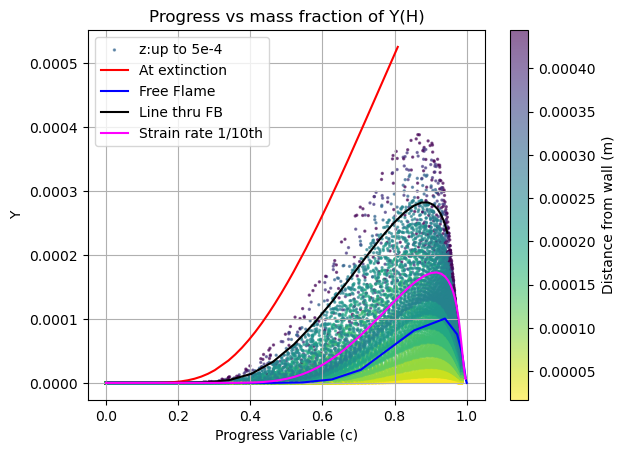

Y(H2)


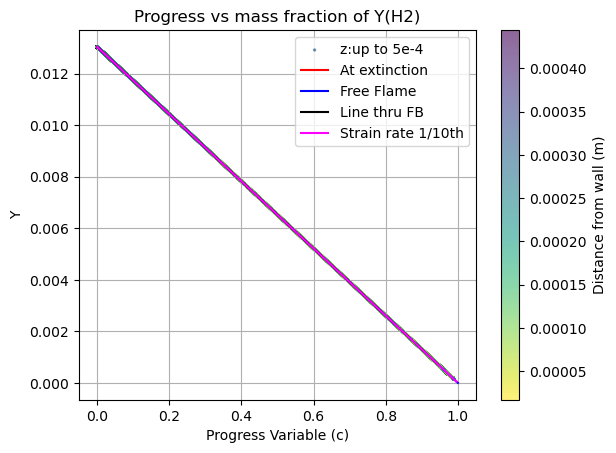

Y(H2O)


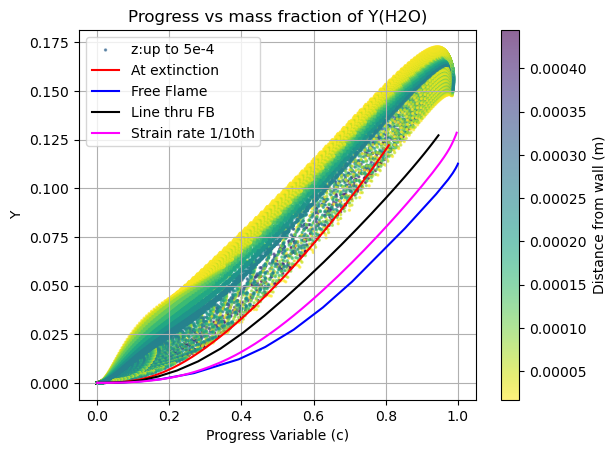

Y(H2O2)


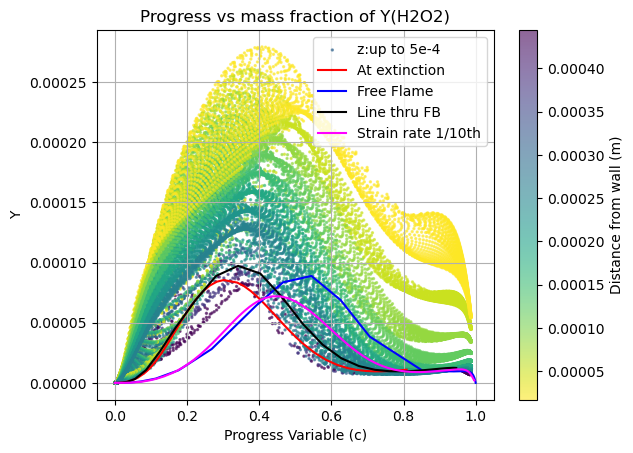

Y(HO2)


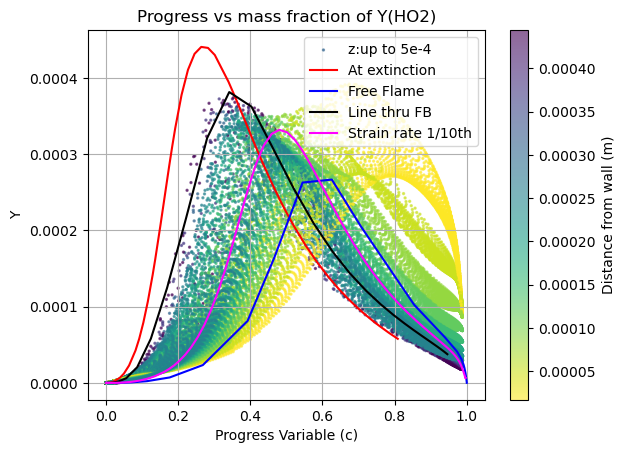

Y(N2)


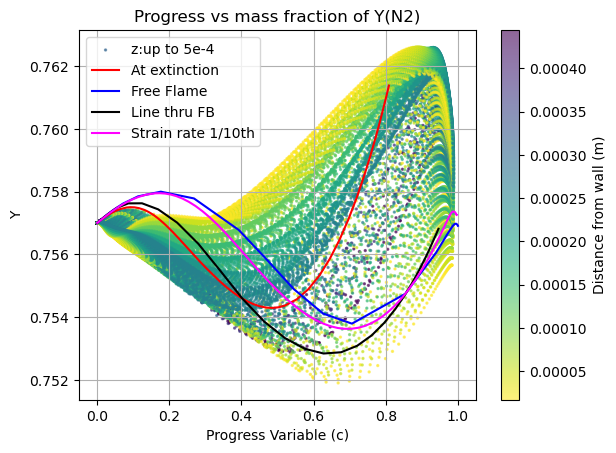

Y(O)


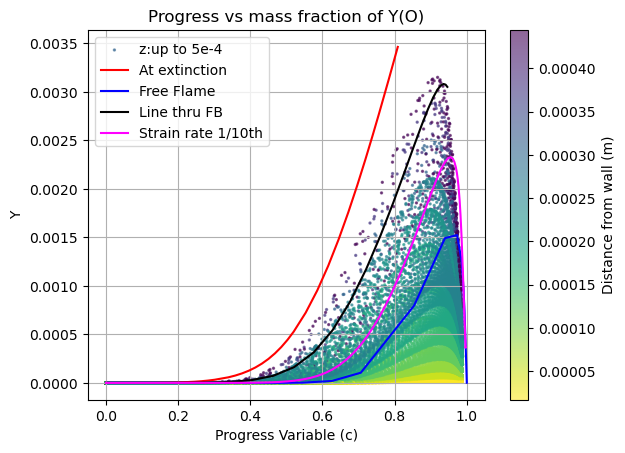

Y(O2)


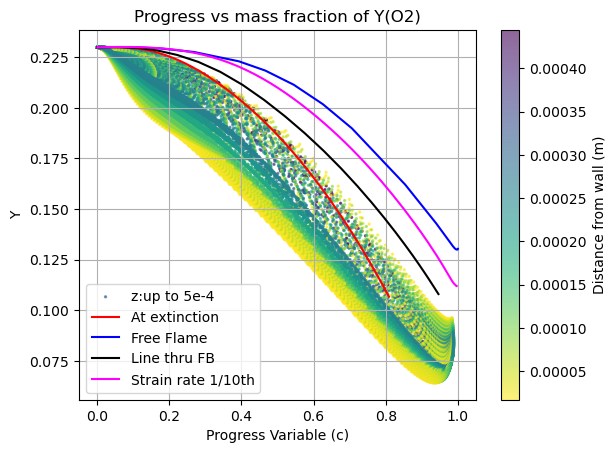

Y(OH)


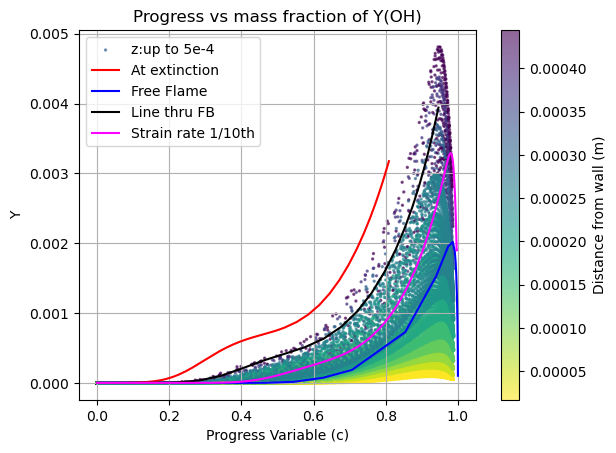

In [142]:

z_m = df["z_m"]
z_close_range = 3.0762e-4
thickness = 2e-4
z_low = z_close_range - thickness
z_hgh = z_close_range + thickness

filter1 = (z_m <= z_hgh) & (z_m>= 0)
for j in range(4,13):
    #print(f'species: {df_n.columns[j]}')
    select_col = df.columns[j]
    print(select_col)
    
    #plt.scatter(temp_c,df.iloc[:,j],s=2,c=z_m,cmap="viridis_r",alpha=0.6,label ="At flashback")
    plt.scatter(temp_c[filter1],df.iloc[:,j][filter1],s=2,c=z_m[filter1],cmap="viridis_r",alpha=0.6,label ="z:up to 5e-4")
    cbar=plt.colorbar()
    cbar.set_label('Distance from wall (m)')
    #plt.scatter(temp_c,df.iloc[:,j],s=2,label ="At flashback")
    #plt.scatter(temp_c[filter1],df.iloc[:,j][filter1],s=3, color = 'dimgrey',label ='Flame Front(gray)',alpha=0.6 )
    plt.plot(c_ext,df_ext[select_col],'red',label='At extinction')
    plt.plot(c_ff,df_ff[select_col],'blue',label='Free Flame')
    plt.plot(df_sline_srt['PV'],df_sline_srt[select_col],c='black',label='Line thru FB')
    plt.plot(df_10th['PV'], df_10th[select_col],  c='magenta',label='Strain rate 1/10th' )
    plt.title(f'Progress vs mass fraction of {spec_list[j]}')
    plt.xlabel('Progress Variable (c)')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    #plt.savefig(f'{outdir}/plt44000_n_Ext_n_FreeFlame_{spec_list[j]}.png',dpi=300,bbox_inches="tight")
    plt.savefig(f'{outdir}/{fname}_n_Ext_n_FreeFlame_n_wallDst_FlameFront_LNthruFB_10thStrain_{spec_list[j]}.png',dpi=300,bbox_inches="tight")
    plt.show()


    """
    """

In [144]:
df_10th.columns

Index(['Y(H2)', 'Y(O2)', 'Y(H2O)', 'Y(H)', 'Y(O)', 'Y(OH)', 'Y(HO2)',
       'Y(H2O2)', 'Y(N2)', 'T', 'z', 'PV'],
      dtype='object')

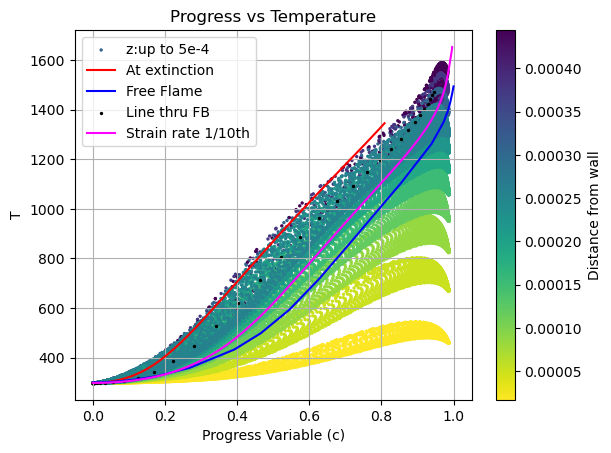

In [148]:

#plt.scatter(temp_c,df['Temp_K'],s=2,label ="At flashback")

plt.scatter(temp_c[filter1],df['Temp_K'][filter1],s=2,c=z_m[filter1],cmap="viridis_r",label ="z:up to 5e-4")
cbar=plt.colorbar()
cbar.set_label('Distance from wall')
plt.plot(c_ext,df_ext['T'],'red',label='At extinction')
plt.plot(c_ff,df_ff['T'],'blue',label='Free Flame')
plt.scatter(df_sline_srt['PV'],df_sline_srt['Temp_K'],s=2,c='black',label='Line thru FB')
plt.plot(df_10th['PV'], df_10th['T'],  c='magenta',label='Strain rate 1/10th' )
#plt.scatter(temp_c[filter1],df['Temp_K'][filter1],s=3, color = 'dimgrey',label ='Flame Front(grey)',alpha=0.6 )
plt.title(f'Progress vs Temperature')
plt.xlabel('Progress Variable (c)')
plt.ylabel('T')
plt.grid()
plt.legend()
#plt.savefig(f'{outdir}/plt44000_n_Ext_n_FreeFlame_temp.png',dpi=300,bbox_inches="tight")
plt.savefig(f'{outdir}/{fname}_n_Ext_n_FreeFlame_n_WallDst_FlameFront_LNthruFB_10thStrain_temp.png',dpi=300,bbox_inches="tight")
plt.show()

In [150]:
z_close_range = 3.0762e-4
thickness = 0.5e-4
z_low = z_close_range - thickness
z_hgh = z_close_range + thickness
filter1 = (z_m <= z_hgh) & (z_m>= z_low)
df.iloc[:,j][filter1]

1098     2.418805e-03
1126     1.846588e-03
1154     1.398892e-03
1182     1.099389e-03
1210     9.262982e-04
             ...     
53538    1.193437e-17
53558    2.484119e-17
53578    4.673944e-17
53598    7.305829e-17
53618    8.078774e-17
Name: Y(OH), Length: 2035, dtype: float64

In [101]:
df_sline["z_m"].unique()

array([0.00119629, 0.00126465])